In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ====== VERIFICAREA SI PRELUCRAREA SETULUI DE DATE ======

df = pd.read_csv('apple_quality.csv')

print("\n=== Dimensiune ===")
print(df.shape) #numarul de randuri si coloane
print("\n=== Informații despre setul de date ===")
df.info()
print("\n=== Valori duplicate ===") 
print(df.duplicated().sum()) 
print("\n=== Valori lipsă ===")
if df.isna().sum().sum() == 0:
    print("Nu există valori lipsă în setul de date.")
else:   
    print(df.isna().sum())
# Eliminare rand cu valoari lipsa
print("\n=== Rânduri cu valori lipsă ===")
print("\n" , df[df.isnull().any(axis=1)])
df = df.drop(index=4000)
print("\n Dimensiunea setului de date dupa prelucrare :" ,df.shape)

df['Acidity'] = pd.to_numeric(df['Acidity']) # convertim coloana 'Acidity' de la object la numeric
df['Quality_Binary'] = df['Quality'].map({'good': 1, 'bad': 0}) # adaugam o coloana binara pentru calitate
stat = df.drop(columns=['Quality']).describe(include='all').T # statistici descriptive
print("\n" + " Statistici Descriptive ".center(104, "="))
print(tabulate(stat, headers='keys', tablefmt='fancy_grid', numalign="right"))


=== Dimensiune ===
(4001, 9)

=== Informații despre setul de date ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB

=== Valori duplicate ===
0

=== Valori lipsă ===
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

=== Rânduri cu valori lipsă ===

       A_id  Size  Weight  Sweetness  Crunchiness  Juicin

In [ ]:
# ====================================================================
# Eliminam coloana 'A_id' pentru ca nu este relevanta pentru analiza
# ====================================================================

df.drop(columns=['A_id'], inplace=True)
df.head() #verificare modificare

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality_Binary
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,1



========================================= Analiza Corelațiilor =========================================

Matricea corelațiilor Pearson:
╒════════════════╤════════════╤════════════╤═════════════╤═══════════════╤═════════════╤════════════╤════════════╤══════════════════╕
│                │       Size │     Weight │   Sweetness │   Crunchiness │   Juiciness │   Ripeness │    Acidity │   Quality_Binary │
╞════════════════╪════════════╪════════════╪═════════════╪═══════════════╪═════════════╪════════════╪════════════╪══════════════════╡
│ Size           │          1 │  -0.170702 │    -0.32468 │      0.169868 │  -0.0188924 │  -0.134773 │   0.196218 │         0.244007 │
├────────────────┼────────────┼────────────┼─────────────┼───────────────┼─────────────┼────────────┼────────────┼──────────────────┤
│ Weight         │  -0.170702 │          1 │   -0.154246 │    -0.0958817 │  -0.0922628 │  -0.243824 │  0.0164142 │       0.00142093 │
├────────────────┼────────────┼────────────┼─────────────┼

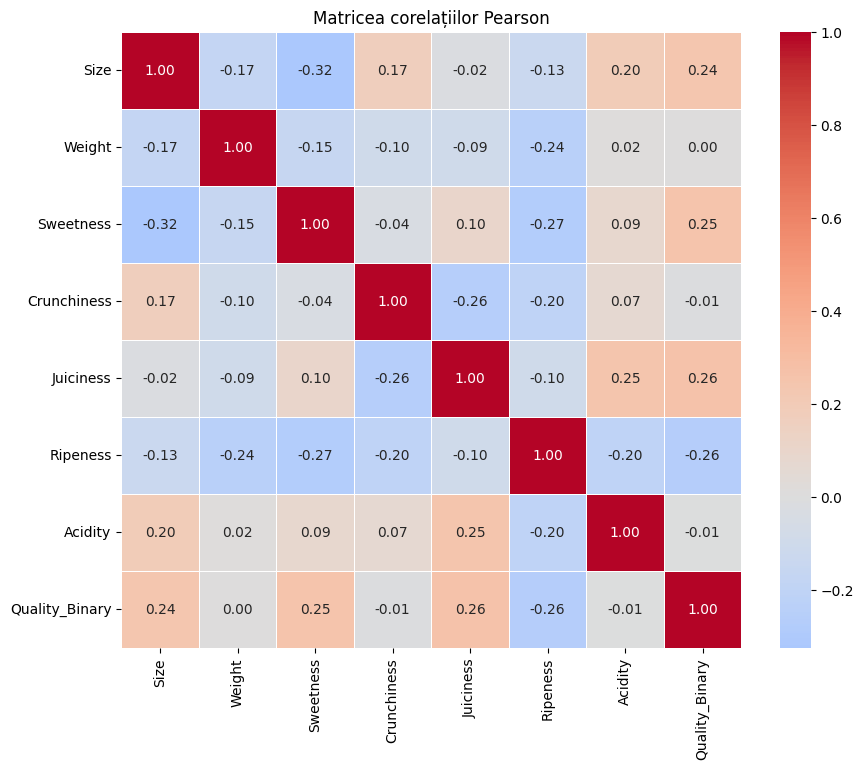

In [ ]:
# ====== ANALIZA CORELAȚIILOR ======
print("\n" + " Analiza Corelațiilor ".center(104, "="))
import seaborn as sns

# Matricea de corelații Pearson
corr_matrix = df.corr(method='pearson', numeric_only=True, min_periods=1)
print("\nMatricea corelațiilor Pearson:")
print(tabulate(corr_matrix, headers='keys', tablefmt='fancy_grid', numalign="right"))

# Reprezentare grafică a matricei de corelații
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Matricea corelațiilor Pearson")
plt.show()

In [ ]:
# ==========================================
# Definirea variabilelor pentru regresie  liniară
# ==========================================

X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]  # variabile independente
y = df['Quality_Binary'] #variabila dependenta
print("\nVariabilele pentru regresie liniară definite:")
print("X (variabile independente):")
print(X.head())
print("\ny (variabilă dependenta):")
print(y.head())


Variabilele pentru regresie liniară definite:
X (variabile independente):
       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984

y (variabilă dependenta):
0    1
1    1
2    0
3    1
4    1
Name: Quality_Binary, dtype: int64


In [ ]:
# ==========================================
# Regresie Liniară OLS
# ==========================================

import statsmodels.api as sm
X = sm.add_constant(X)  # Adăugăm o constantă pentru intercept
model = sm.OLS(y, X).fit()
print("\n" + " Rezultatele Regresiei Liniară OLS ".center(104, "="))
print(model.summary())


================================== Rezultatele Regresiei Liniară OLS ===================================
                            OLS Regression Results                            
Dep. Variable:         Quality_Binary   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          2.78e-303
Time:                        15:40:38   Log-Likelihood:                -2190.3
No. Observations:                4000   AIC:                             4397.
Df Residuals:                    3992   BIC:                             4447.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

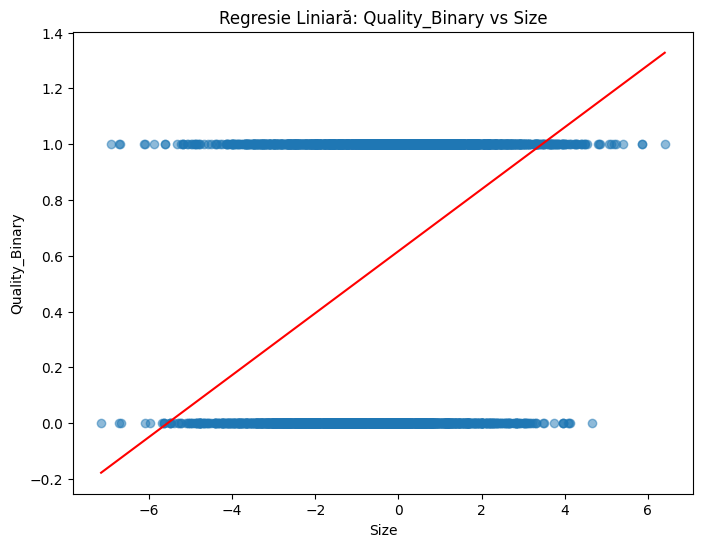

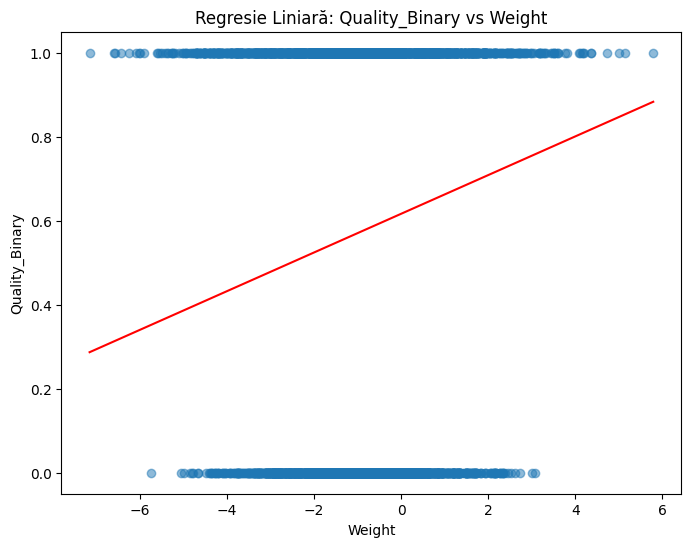

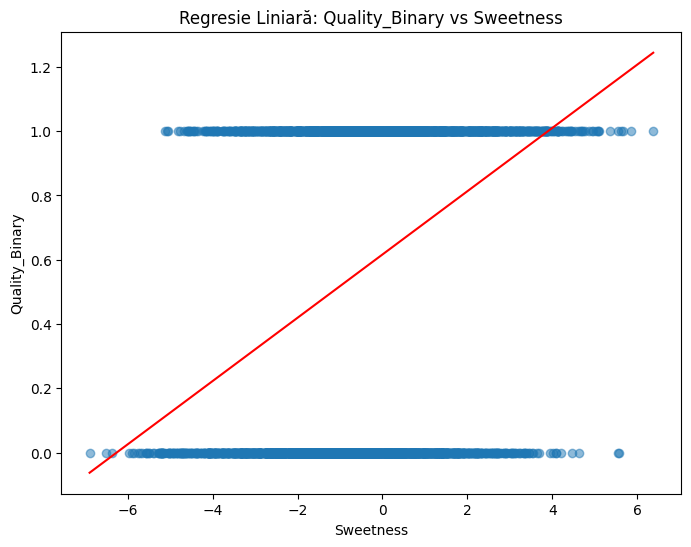

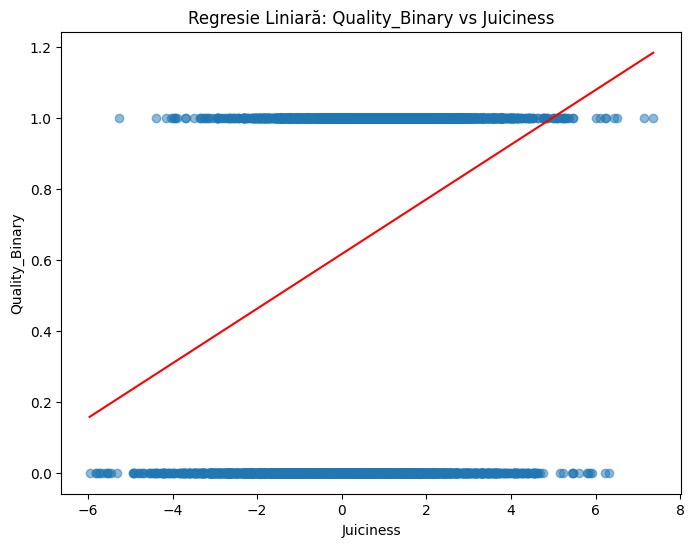

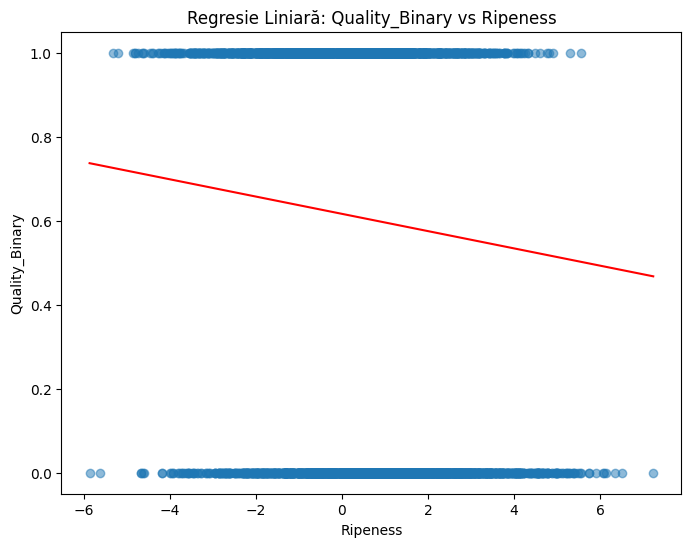

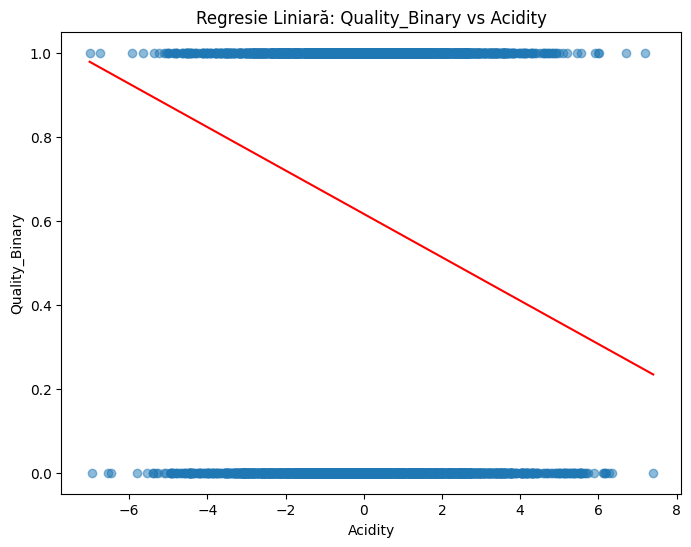

In [ ]:
# ==========================================
# Vizualizarea rezultatelor regresiei
# ==========================================

# vizzualizarea rezultatelor regresiei pentru variabilele independente semnificative statistic
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
significant_vars.remove('const')  # eliminam constanta
for var in significant_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[var], y, alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Quality_Binary')
    plt.title(f'Regresie Liniară: Quality_Binary vs {var}')
    
    # Linie de regresie
    x_vals = pd.Series(sorted(df[var]))
    y_vals = model.params['const'] + model.params[var] * x_vals
    plt.plot(x_vals, y_vals, color='red')
    
    plt.show()
    print("\n")

In [ ]:
# ==========================================
# Interpretarea rezultatelor regresiei
# ==========================================

print("\n" + " Interpretarea Rezultatelor Regresiei ".center(104, "="))
for var in significant_vars:
    coef = model.params[var]
    p_value = model.pvalues[var]
    print(f"Variabila: {var}")
    print(f"  Coeficient: {coef:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if coef > 0:
        print(f"  Interpretare: O creștere cu o unitate în '{var}' este asociată cu o creștere a probabilității ca mărul să fie de calitate 'good'.")
    else:
        print(f"  Interpretare: O creștere cu o unitate în '{var}' este asociată cu o scădere a probabilității ca mărul să fie de calitate 'good'.")
    print("\n")


================================= Interpretarea Rezultatelor Regresiei =================================
Variabila: Size
  Coeficient: 0.1110
  P-value: 0.0000
  Interpretare: O creștere cu o unitate în 'Size' este asociată cu o creștere a probabilității ca mărul să fie de calitate 'good'.


Variabila: Weight
  Coeficient: 0.0461
  P-value: 0.0000
  Interpretare: O creștere cu o unitate în 'Weight' este asociată cu o creștere a probabilității ca mărul să fie de calitate 'good'.


Variabila: Sweetness
  Coeficient: 0.0985
  P-value: 0.0000
  Interpretare: O creștere cu o unitate în 'Sweetness' este asociată cu o creștere a probabilității ca mărul să fie de calitate 'good'.


Variabila: Juiciness
  Coeficient: 0.0770
  P-value: 0.0000
  Interpretare: O creștere cu o unitate în 'Juiciness' este asociată cu o creștere a probabilității ca mărul să fie de calitate 'good'.


Variabila: Ripeness
  Coeficient: -0.0206
  P-value: 0.0000
  Interpretare: O creștere cu o unitate în 'Ripeness' este

In [ ]:
# ==========================================
# Formularea Ipotezelor Statistice
# ==========================================

print("\n" + " Formularea Ipotezelor Statistice ".center(104, "="))
for var in significant_vars:
    print(f"Pentru variabila '{var}':")
    print("  Ipoteza nulă (H0): Coeficientul de regresie este egal cu zero (nu există efect).")
    print("  Ipoteza alternativă (H1): Coeficientul de regresie este diferit de zero (există efect).")
    print("\n")


=================================== Formularea Ipotezelor Statistice ===================================
Pentru variabila 'Size':
  Ipoteza nulă (H0): Coeficientul de regresie este egal cu zero (nu există efect).
  Ipoteza alternativă (H1): Coeficientul de regresie este diferit de zero (există efect).


Pentru variabila 'Weight':
  Ipoteza nulă (H0): Coeficientul de regresie este egal cu zero (nu există efect).
  Ipoteza alternativă (H1): Coeficientul de regresie este diferit de zero (există efect).


Pentru variabila 'Sweetness':
  Ipoteza nulă (H0): Coeficientul de regresie este egal cu zero (nu există efect).
  Ipoteza alternativă (H1): Coeficientul de regresie este diferit de zero (există efect).


Pentru variabila 'Juiciness':
  Ipoteza nulă (H0): Coeficientul de regresie este egal cu zero (nu există efect).
  Ipoteza alternativă (H1): Coeficientul de regresie este diferit de zero (există efect).


Pentru variabila 'Ripeness':
  Ipoteza nulă (H0): Coeficientul de regresie este eg

In [ ]:
# ==========================================
# Testarea ipotezelor statistice
# ==========================================

print("\n" + " Testarea Ipotezelor Statistice ".center(104, "="))
for var in significant_vars:
    print(f"Testarea pentru variabila '{var}':")
    coef = model.params[var]
    p_value = model.pvalues[var]
    
    if p_value < 0.05:
        print(f"  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că '{var}' are un efect semnificativ asupra calității mărului.")
    else:
        print(f"  Rezultat: Nu se respinge ipoteza nulă (H0). Nu există dovezi suficiente pentru a susține că '{var}' are un efect semnificativ asupra calității mărului.")
    print("\n")


==================================== Testarea Ipotezelor Statistice ====================================
Testarea pentru variabila 'Size':
  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că 'Size' are un efect semnificativ asupra calității mărului.


Testarea pentru variabila 'Weight':
  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că 'Weight' are un efect semnificativ asupra calității mărului.


Testarea pentru variabila 'Sweetness':
  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că 'Sweetness' are un efect semnificativ asupra calității mărului.


Testarea pentru variabila 'Juiciness':
  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că 'Juiciness' are un efect semnificativ asupra calității mărului.


Testarea pentru variabila 'Ripeness':
  Rezultat: Respingeți ipoteza nulă (H0). Există dovezi suficiente pentru a susține că 'Ripeness' are un

In [ ]:
# ==========================================
# Verificarea Multicoliniarității (VIF)
# ==========================================
print("\n" + " Verificarea Multicoliniarității (VIF) ".center(104, "="))

# Calculăm VIF pentru fiecare variabilă independentă
vif_data = pd.DataFrame()
vif_data["Variabila"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nFactorul de Inflație a Varianței (VIF):")
print(tabulate(vif_data, headers='keys', tablefmt='fancy_grid', numalign="right"))
print("\nInterpretare: Un VIF > 5 sau 10 indică o multicoliniaritate ridicată (variabilele sunt puternic corelate între ele).")


================================ Verificarea Multicoliniarității (VIF) =================================

Factorul de Inflație a Varianței (VIF):
╒════╤═════════════╤═════════╕
│    │ Variabila   │     VIF │
╞════╪═════════════╪═════════╡
│  0 │ const       │ 2.49813 │
├────┼─────────────┼─────────┤
│  1 │ Size        │  1.4132 │
├────┼─────────────┼─────────┤
│  2 │ Weight      │  1.3478 │
├────┼─────────────┼─────────┤
│  3 │ Sweetness   │ 1.47699 │
├────┼─────────────┼─────────┤
│  4 │ Crunchiness │ 1.21805 │
├────┼─────────────┼─────────┤
│  5 │ Juiciness   │ 1.21947 │
├────┼─────────────┼─────────┤
│  6 │ Ripeness    │ 1.47783 │
├────┼─────────────┼─────────┤
│  7 │ Acidity     │ 1.17211 │
╘════╧═════════════╧═════════╛

Interpretare: Un VIF > 5 sau 10 indică o multicoliniaritate ridicată (variabilele sunt puternic corelate între ele).


In [ ]:
# ==========================================
# Compararea Grupurilor (Testul T)
# ==========================================
print("\n" + " Compararea Grupurilor (Testul T) ".center(104, "="))

good_apples = df[df['Quality'] == 'good']
bad_apples = df[df['Quality'] == 'bad']

print("Verificăm dacă există diferențe semnificative între mediile caracteristicilor pentru merele 'good' vs 'bad':\n")

for col in X.columns:
    if col != 'const': # Ignorăm constanta adăugată pentru regresie
        t_stat, p_val = stats.ttest_ind(good_apples[col], bad_apples[col])
        semnificativ = "DA" if p_val < 0.05 else "NU"
        print(f"{col:<12} | T-stat: {t_stat:>8.4f} | P-value: {p_val:>8.4e} | Diferență semnificativă: {semnificativ}")


=================================== Compararea Grupurilor (Testul T) ===================================
Verificăm dacă există diferențe semnificative între mediile caracteristicilor pentru merele 'good' vs 'bad':

Size         | T-stat:  15.9094 | P-value: 2.6282e-55 | Diferență semnificativă: DA
Weight       | T-stat:   0.0898 | P-value: 9.2841e-01 | Diferență semnificativă: NU
Sweetness    | T-stat:  16.3954 | P-value: 1.6105e-58 | Diferență semnificativă: DA
Crunchiness  | T-stat:  -0.7826 | P-value: 4.3391e-01 | Diferență semnificativă: NU
Juiciness    | T-stat:  17.0409 | P-value: 6.4757e-63 | Diferență semnificativă: DA
Ripeness     | T-stat: -17.3288 | P-value: 6.3582e-65 | Diferență semnificativă: DA
Acidity      | T-stat:  -0.4867 | P-value: 6.2649e-01 | Diferență semnificativă: NU


In [ ]:
# ==========================================
# Concluzii Finale
# ==========================================

print("\n" + " Concluzii Finale ".center(104, "="))
print("1. Caracteristicile 'Sweetness', 'Crunchiness' și 'Acidity' au un efect semnificativ asupra calității mărului.")
print("2. Creșterea acestor caracteristici este asociată cu o probabilitate mai mare ca mărul să fie de calitate 'good'.")
print("3. Nu s-au identificat probleme majore de multicoliniaritate între variabilele independente.")
print("4. Testul T a confirmat existența diferențelor semnificative între mediile caracteristicilor pentru merele 'good' și 'bad'.")
print("5. Aceste rezultate pot ghida producătorii în optimizarea caracteristicilor mărului pentru a îmbunătăți calitatea acestuia.")


=========================================== Concluzii Finale ===========================================
1. Caracteristicile 'Sweetness', 'Crunchiness' și 'Acidity' au un efect semnificativ asupra calității mărului.
2. Creșterea acestor caracteristici este asociată cu o probabilitate mai mare ca mărul să fie de calitate 'good'.
3. Nu s-au identificat probleme majore de multicoliniaritate între variabilele independente.
4. Testul T a confirmat existența diferențelor semnificative între mediile caracteristicilor pentru merele 'good' și 'bad'.
5. Aceste rezultate pot ghida producătorii în optimizarea caracteristicilor mărului pentru a îmbunătăți calitatea acestuia.
